In [46]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline 
sns.set()

In [2]:
#reading the dataset 
data=pd.read_csv('Mall_Customers.csv')

In [3]:
#displaying the first 5 rows of the dataset 
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#searching for duplicates
data.duplicated().sum()

0

In [5]:
#searching for nulls 
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# exploratory data analysis 

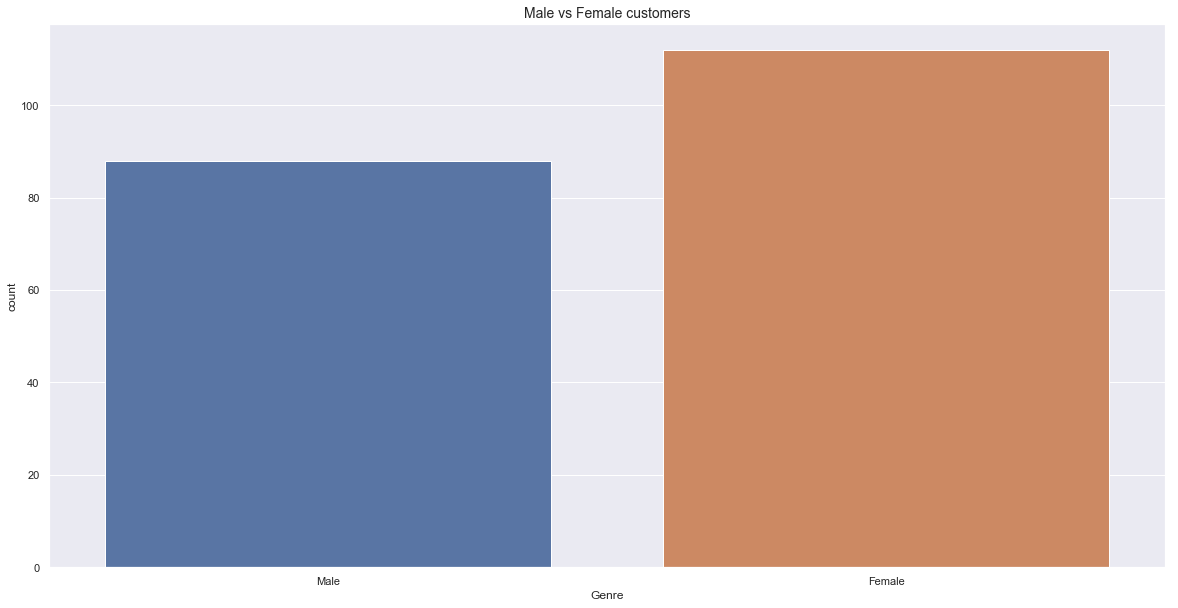

In [47]:
#male vs female counts
plt.figure(figsize=(20,10))
sns.countplot(data.Genre)
plt.title('Male vs Female customers',fontsize=14)
plt.show()

### females are slightly higher than males 

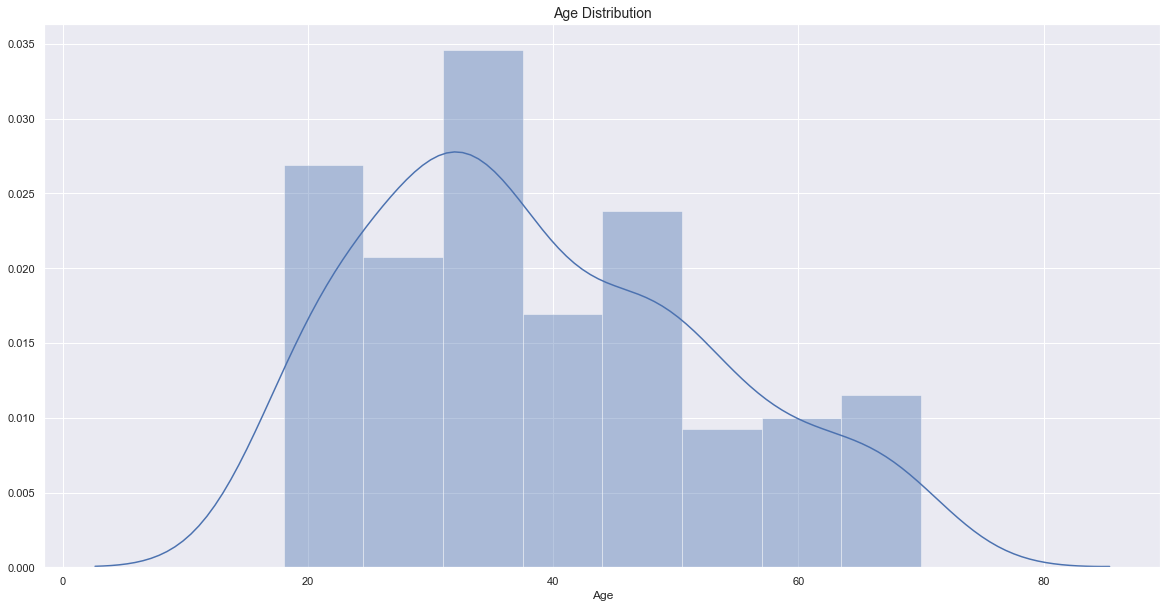

In [48]:
#age distribution
plt.figure(figsize=(20,10))
sns.distplot(data.Age)
plt.title('Age Distribution',fontsize=14)
plt.show()

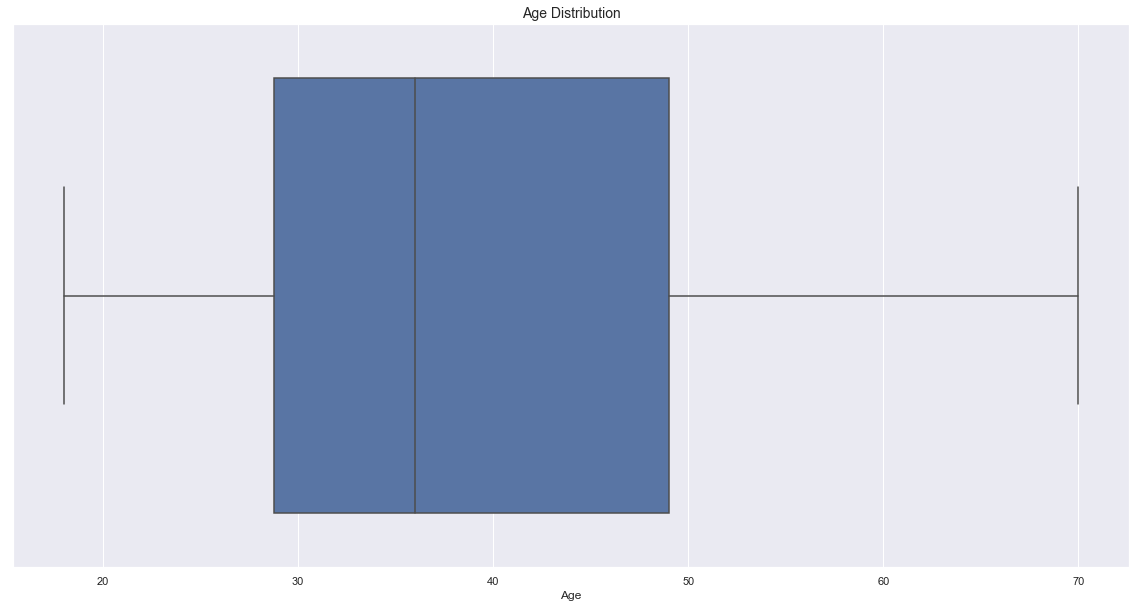

In [49]:
plt.figure(figsize=(20,10))
sns.boxplot(data.Age)
plt.title('Age Distribution',fontsize=14)
plt.show()

### our user ages falls mostly between 29 and 50 , their median is 35 

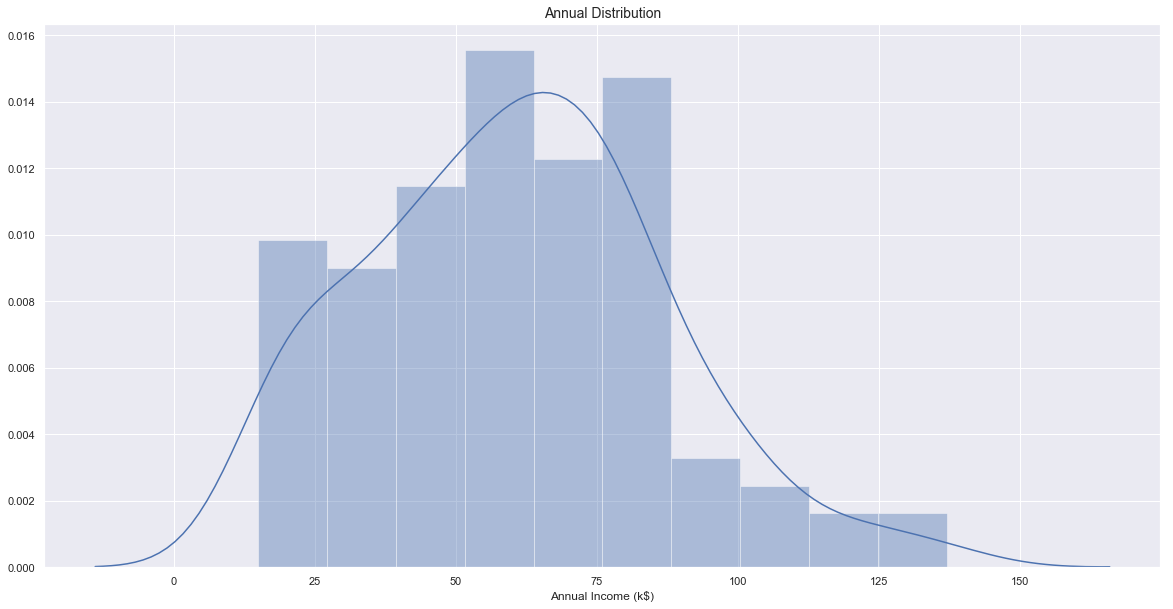

In [50]:
#annual income distribution
plt.figure(figsize=(20,10))
sns.distplot(data['Annual Income (k$)'])
plt.title('Annual Distribution',fontsize=14)
plt.show()

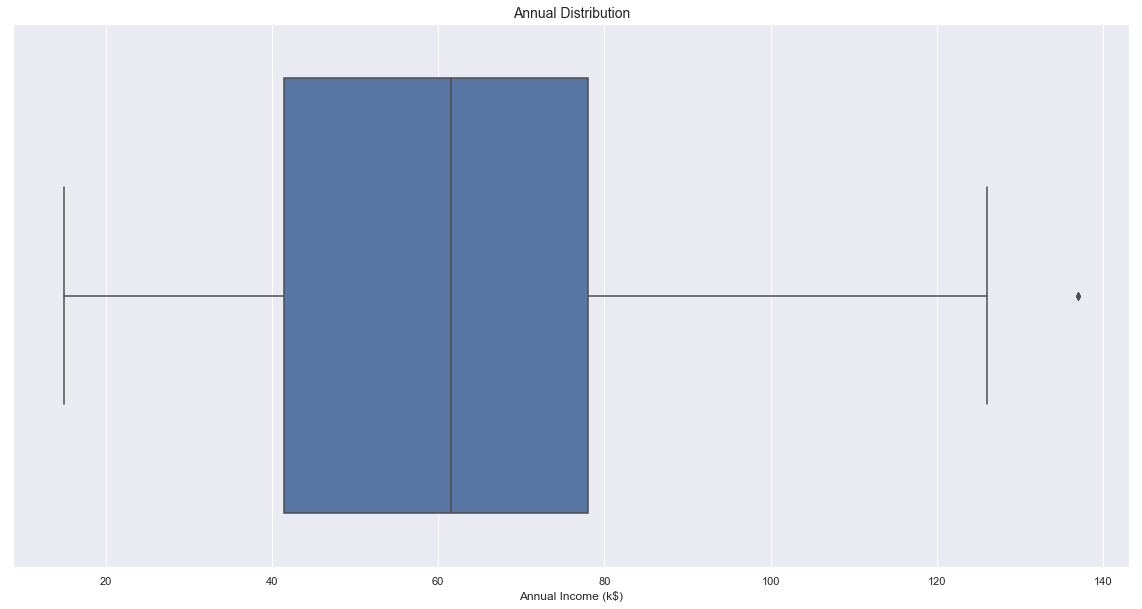

In [51]:
plt.figure(figsize=(20,10))
sns.boxplot(data['Annual Income (k$)'])
plt.title('Annual Distribution',fontsize=14)
plt.show()

# our user income falls mostly between 40 and 80 k , the median is about 60 k

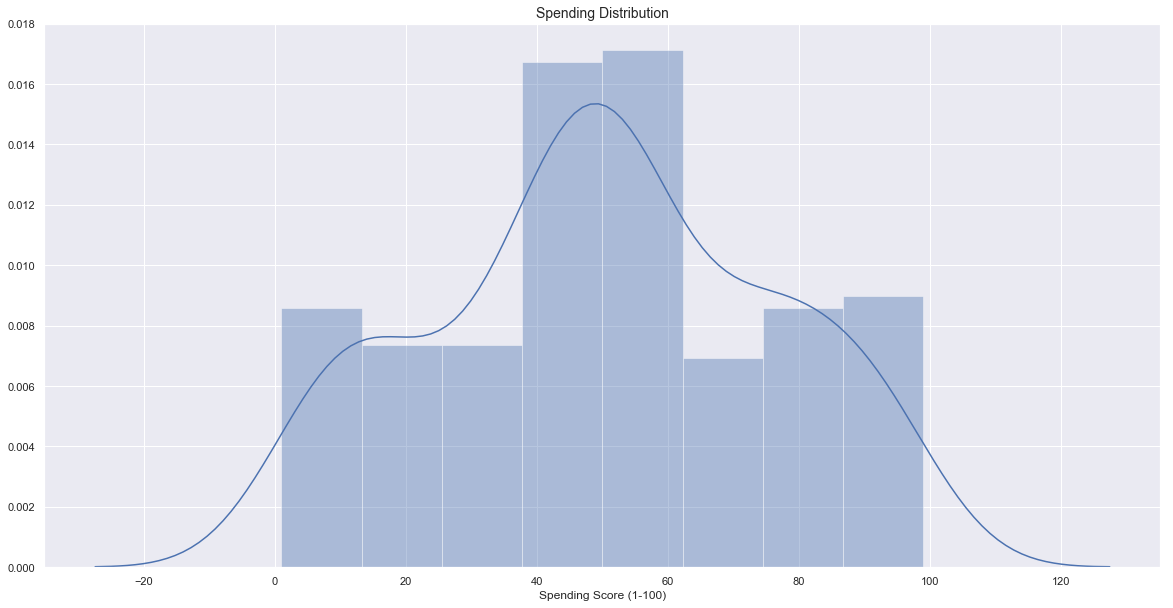

In [52]:
#spending score distribution
plt.figure(figsize=(20,10))
sns.distplot(data['Spending Score (1-100)'])
plt.title('Spending Distribution',fontsize=14)
plt.show()

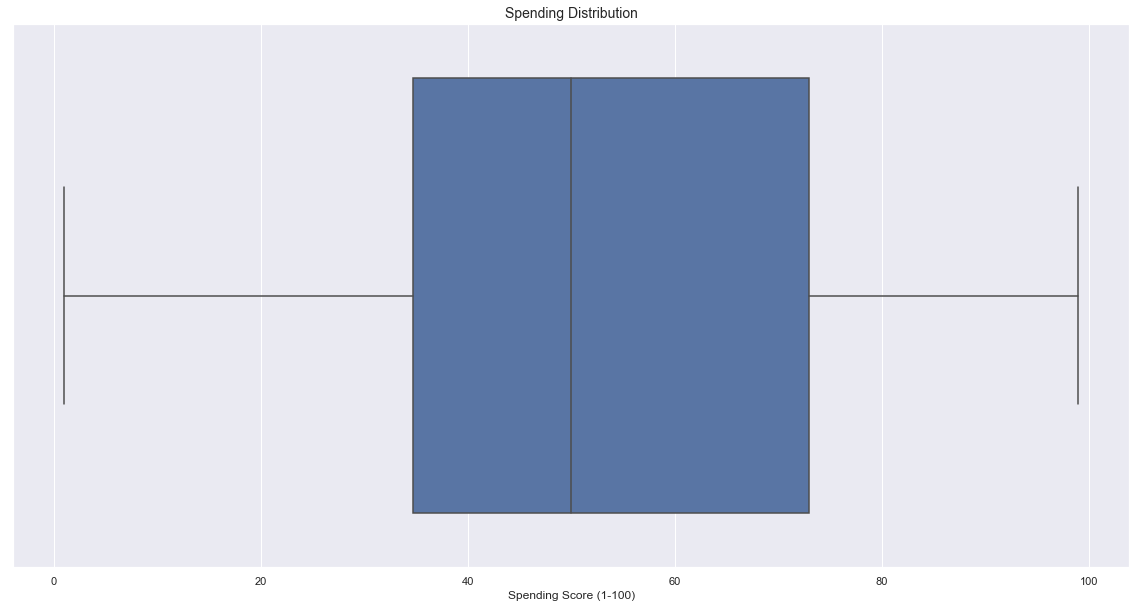

In [53]:
plt.figure(figsize=(20,10))
sns.boxplot(data['Spending Score (1-100)'])
plt.title('Spending Distribution',fontsize=14)
plt.show()

### most of our users spending is between 35 and 75 , median is about 50 

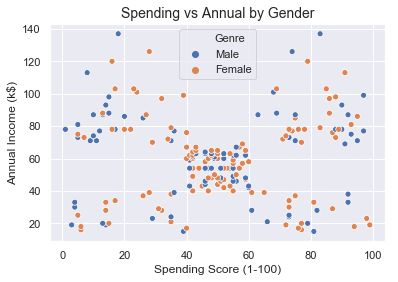

In [54]:
#searching for patterns in scoring vs annual
sns.scatterplot(data['Spending Score (1-100)'],data['Annual Income (k$)'],hue=data['Genre'])
plt.title('Spending vs Annual by Gender',fontsize=14)
plt.show()

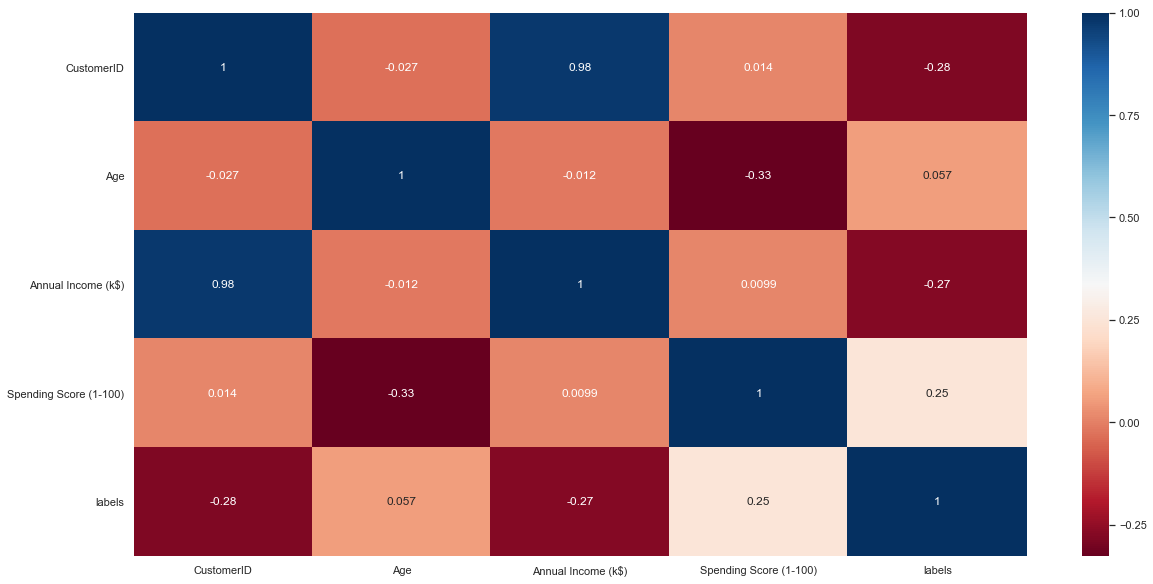

In [55]:
#searching for correlations
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap='RdBu')

In [22]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [30]:
#slicing the annual vs spending only 
x=data[['Annual Income (k$)','Spending Score (1-100)']]


In [31]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


# Customer Segmentation

### finding the perfect number of clusters by elbow method 

In [32]:
wcss =[]
for k in range(1,10):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30241.34361793659,
 25012.917069885476,
 21850.165282585633]

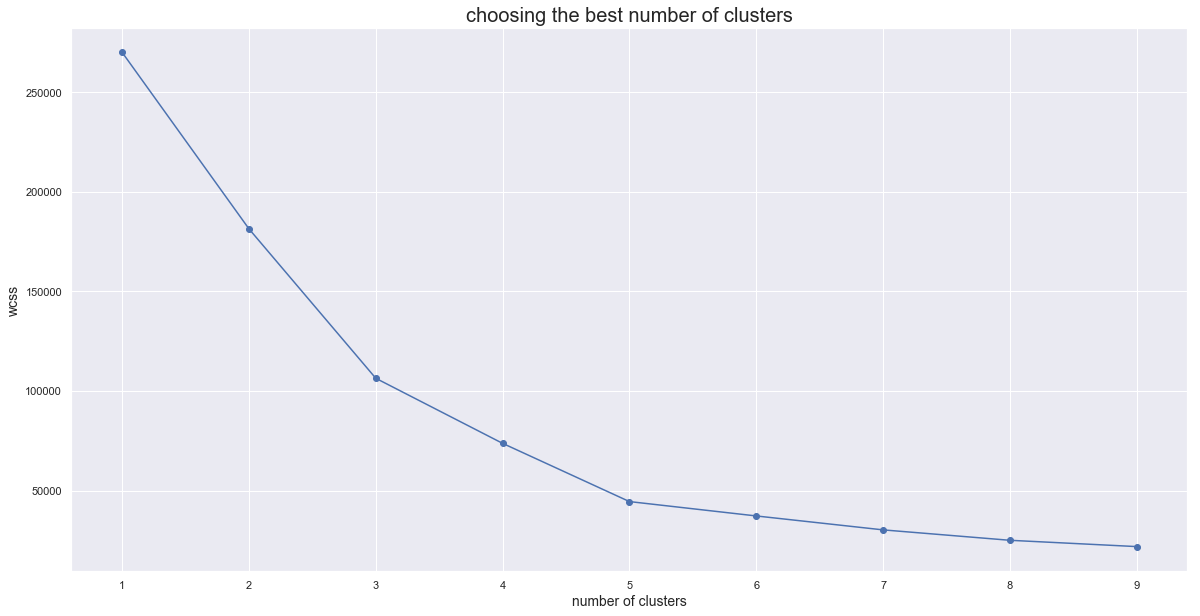

In [56]:
plt.figure(figsize=(20,10))
plt.plot(range(1,10),wcss,marker='o')
plt.title('choosing the best number of clusters',fontsize=20)
plt.xlabel('number of clusters',fontsize=14)
plt.ylabel('wcss',fontsize=14)
plt.show()

### The optimal number of clusters is 5 

# Customer Segmenatation

In [39]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(x)
y=kmeans.predict(x)
print(y)

[4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 2 4 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 0 3 2 3 0 3 0 3 2 3 0 3 0 3 0 3 0 3 2 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3]


In [41]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),labels
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4


In [69]:
data['labels']=y

# Renaming the customer segments due to their income and spending scores 

In [71]:
data['labels']=data.labels.map({0:'low spending high income',
                   1:'high spending low income',
                   2:'middle spending middle income',
                   3:'high spending high income',
                   4:'low spending low income'})

In [72]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),labels
0,1,Male,19,15,39,low spending low income
1,2,Male,21,15,81,high spending low income
2,3,Female,20,16,6,low spending low income
3,4,Female,23,16,77,high spending low income
4,5,Female,31,17,40,low spending low income


# Visualizing the segments 

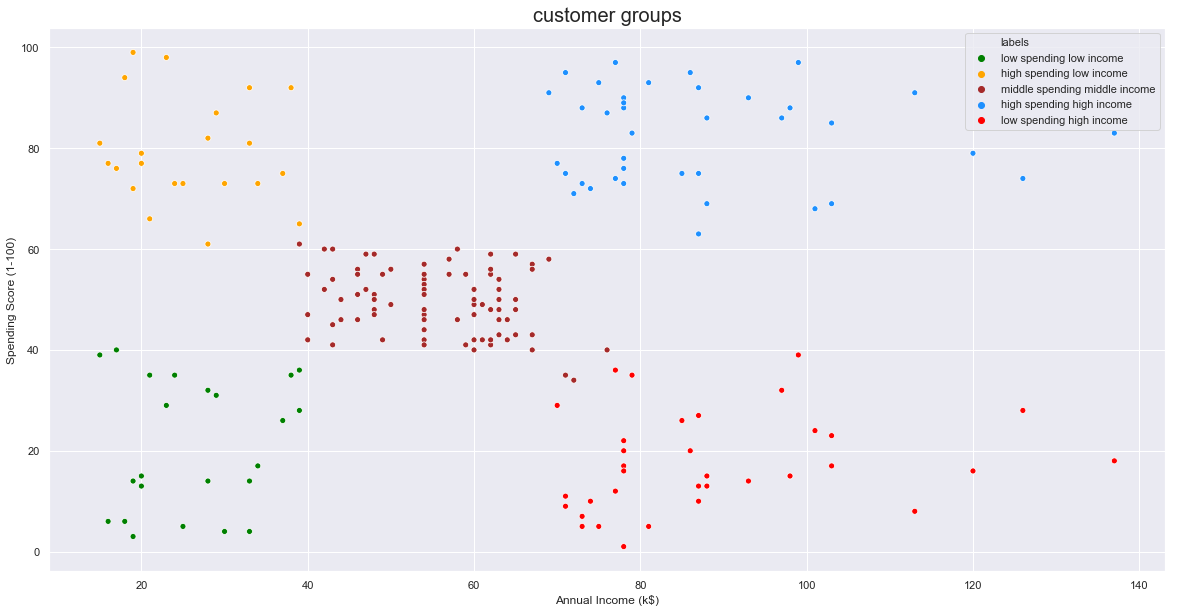

In [73]:
plt.figure(figsize=(20,10))
sns.scatterplot(data['Annual Income (k$)'],data['Spending Score (1-100)'],hue=data['labels'],palette=['green','orange','brown','dodgerblue','red'],legend='brief')
plt.title('customer groups',fontsize=20)
plt.legend()
plt.show()

### making calculations for every segment

In [77]:
grouping=data.groupby('labels').mean().round()
grouping.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
labels,,,,
high spending high income,162.0,33.0,87.0,82.0
high spending low income,23.0,25.0,26.0,79.0
low spending high income,164.0,41.0,88.0,17.0
low spending low income,23.0,45.0,26.0,21.0
middle spending middle income,86.0,43.0,55.0,50.0
